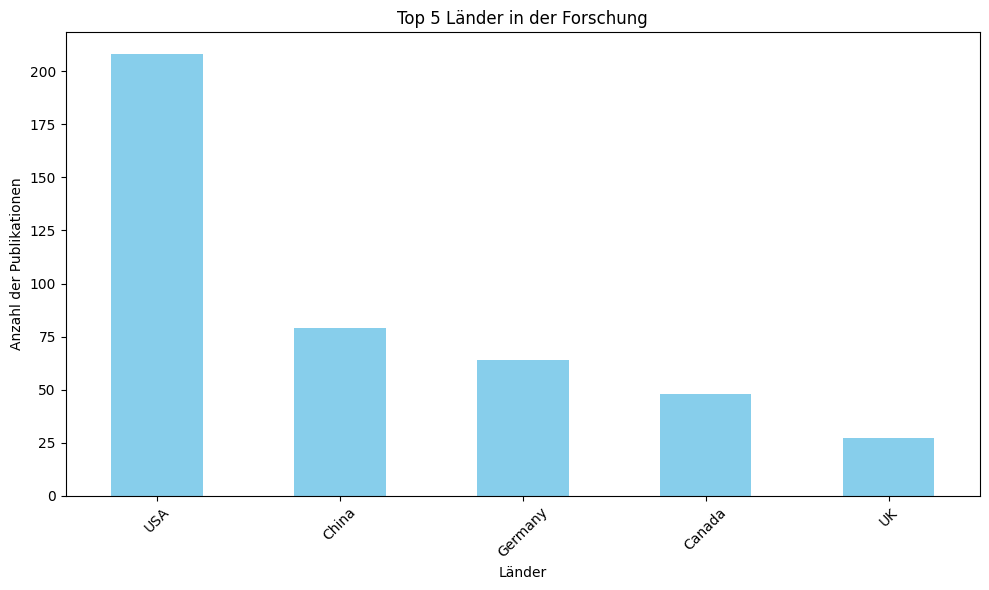

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from collections import defaultdict

# Den Pfad zur CSV-Datei definieren (angenommen, sie liegt im 'data'-Ordner deines Projekts)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'test_dataset.csv')

# CSV-Datei einlesen
df = pd.read_csv(csv_file_path)
df2 = pd.read_csv(csv_file_path)


#-------------------------------------------------------------------------------
# Welche 5 Länder sind Spitzenreiter in der Forschung?

# Extrahieren der Länder aus den Affiliations
df['Country'] = df['Author Affiliations'].dropna().apply(lambda x: x.split(',')[-1].strip())

# Die häufigsten 5 Länder identifizieren
top_countries = df['Country'].value_counts().head(5)

# Ausgabe der Top 5 Länder als Bar-Chart
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Länder in der Forschung')
plt.ylabel('Anzahl der Publikationen')
plt.xlabel('Länder')
plt.xticks(rotation=45)
plt.tight_layout()

# Grafik anzeigen
plt.show()

#-------------------------------------------------------------------------------
# Publikationen der Länder auf einer Geokarte

# Extrahieren der Länder aus den Affiliations
df2['Country'] = df2['Author Affiliations'].dropna().apply(lambda x: x.split(',')[-1].strip())

# Aggregation der Publikationen pro Land
country_counts = df2['Country'].value_counts()

# Initialisiere Geolocator (um Koordinaten zu finden)
geolocator = Nominatim(user_agent="geo_pub_map")

# Finde die Koordinaten für jedes Land
coordinates = {}
for country in country_counts.index:
    try:
        location = geolocator.geocode(country)
        if location:
            coordinates[country] = (location.latitude, location.longitude)
    except Exception as e:
        print(f"Fehler beim Finden der Koordinaten für {country}: {e}")

# Erstelle eine Geo-Karte mit folium
m = folium.Map(location=[20, 0], zoom_start=2)  # Weltkarte initialisieren

# Hinzufügen von Markern für jedes Land
for country, count in country_counts.items():
    if country in coordinates:
        lat, lon = coordinates[country]
        folium.CircleMarker(
            location=[lat, lon],
            radius=count / country_counts.max() * 20,  # Punktgröße proportional zur Publikationszahl
            popup=f"{country}: {count} Publikationen",
            color="blue",
            fill=True,
            fill_opacity=0.6,
        ).add_to(m)

# Karte direkt in Jupyter Notebook anzeigen
m

# # Extrahieren der Länder aus den Affiliations
# df2['Country'] = df2['Author Affiliations'].dropna().apply(lambda x: x.split(',')[-1].strip())

# # Aggregation der Publikationen pro Land
# country_counts = df2['Country'].value_counts()

# # Initialisiere Geolocator (um Koordinaten zu finden)
# geolocator = Nominatim(user_agent="geo_pub_map")

# # Finde die Koordinaten für jedes Land
# coordinates = {}
# for country in country_counts.index:
#     try:
#         location = geolocator.geocode(country)
#         if location:
#             coordinates[country] = (location.latitude, location.longitude)
#     except Exception as e:
#         print(f"Fehler beim Finden der Koordinaten für {country}: {e}")

# # Erstelle eine Geo-Karte mit folium
# m = folium.Map(location=[20, 0], zoom_start=2)  # Weltkarte initialisieren

# # Hinzufügen von Markern für jedes Land
# for country, count in country_counts.items():
#     if country in coordinates:
#         lat, lon = coordinates[country]
#         folium.CircleMarker(
#             location=[lat, lon],
#             radius=count / country_counts.max() * 20,  # Punktgröße proportional zur Publikationszahl
#             popup=f"{country}: {count} Publikationen",
#             color="blue",
#             fill=True,
#             fill_opacity=0.6,
#         ).add_to(m)

# # Karte anzeigen
# m.save("publications_map.html")
# print("Karte wurde als 'publications_map.html' gespeichert.")